# Introduction

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

## Looking at data

In [ ]:
df = pd.read_csv('/content/spotify_data.csv', index_col=0, converters={'artist': literal_eval})

In [ ]:
df.head()

artist  ... time_signature
0     [Coldplay]  ...            4.0
1  [Silverchair]  ...            4.0
2     [Coldplay]  ...            3.0
3    [Green Day]  ...            4.0
4       [Eminem]  ...            4.0

[5 rows x 23 columns]

In [ ]:
df.tail()

artist  ... time_signature
21990       [YBN Nahmir, 21 Savage]  ...            4.0
21991                   [Incognito]  ...            4.0
21992                   [MadeinTYO]  ...            4.0
21993    [Incognito, Roger Sanchez]  ...            4.0
21994  [Gunna, Future, Roddy Ricch]  ...            4.0

[5 rows x 23 columns]

## Data Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21995 entries, 0 to 21994
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            21995 non-null  object 
 1   name              21995 non-null  object 
 2   id                21995 non-null  object 
 3   popularity        21995 non-null  float64
 4   is_local          21995 non-null  float64
 5   year              21995 non-null  float64
 6   danceability      21995 non-null  float64
 7   energy            21995 non-null  float64
 8   key               21995 non-null  float64
 9   loudness          21995 non-null  float64
 10  mode              21995 non-null  float64
 11  speechiness       21995 non-null  float64
 12  acousticness      21995 non-null  float64
 13  instrumentalness  21995 non-null  float64
 14  liveness          21995 non-null  float64
 15  valence           21995 non-null  float64
 16  tempo             21995 non-null  float6

In [ ]:
df.describe(include='number').transpose()

count           mean  ...          75%          max
popularity        21995.0      38.580177  ...      66.0000      100.000
is_local          21995.0       0.000000  ...       0.0000        0.000
year              21995.0    2010.499568  ...    2016.0000     2021.000
danceability      21995.0       0.570772  ...       0.6950        0.985
energy            21995.0       0.664822  ...       0.8620        1.000
key               21995.0       5.278154  ...       8.0000       11.000
loudness          21995.0      -7.939076  ...      -5.1720        1.027
mode              21995.0       0.658104  ...       1.0000        1.000
speechiness       21995.0       0.088334  ...       0.0900        0.961
acousticness      21995.0       0.241527  ...       0.4060        0.996
instrumentalness  21995.0       0.173992  ...       0.1025        1.000
liveness          21995.0       0.225112  ...       0.2990        0.996
valence           21995.0       0.488759  ...       0.6880        0.998
tempo             21995.0     122.612742  ...     138.5060      220.099
duration_ms       21995.0  231619.855422  ...  262173.0000  4800118.000
time_signature    21995.0       3.925983  ...       4.0000        5.000

[16 rows x 8 columns]

In [ ]:
df.describe(include='object').transpose()

count  ...   freq
artist        21995  ...    192
name          21995  ...     74
id            21995  ...     11
type          21995  ...  21995
uri           21995  ...     11
track_href    21995  ...     11
analysis_url  21995  ...     11

[7 rows x 4 columns]

---
# Data Cleaning


## Feature Removing

In [ ]:
useless_cols = ['is_local', 'type', 'uri', 'track_href', 'analysis_url']

df = df.drop(columns=useless_cols)

In [ ]:
print('Number of columns:', df.shape[1])

Number of columns: 18


## Missing & Duplicated Data

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated(subset='id').sum()
df = df.drop_duplicates(subset='id')
df.shape

(20933, 18)

## Type Adjustment

In [ ]:
int_cols = ['year', 'key', 'mode', 'time_signature',]
df[int_cols] = df.loc[:, int_cols].astype('int')
df.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


artist  ... time_signature
21990       [YBN Nahmir, 21 Savage]  ...              4
21991                   [Incognito]  ...              4
21992                   [MadeinTYO]  ...              4
21993    [Incognito, Roger Sanchez]  ...              4
21994  [Gunna, Future, Roddy Ricch]  ...              4

[5 rows x 18 columns]

---
# Exploratory Data Analysis

## Overview

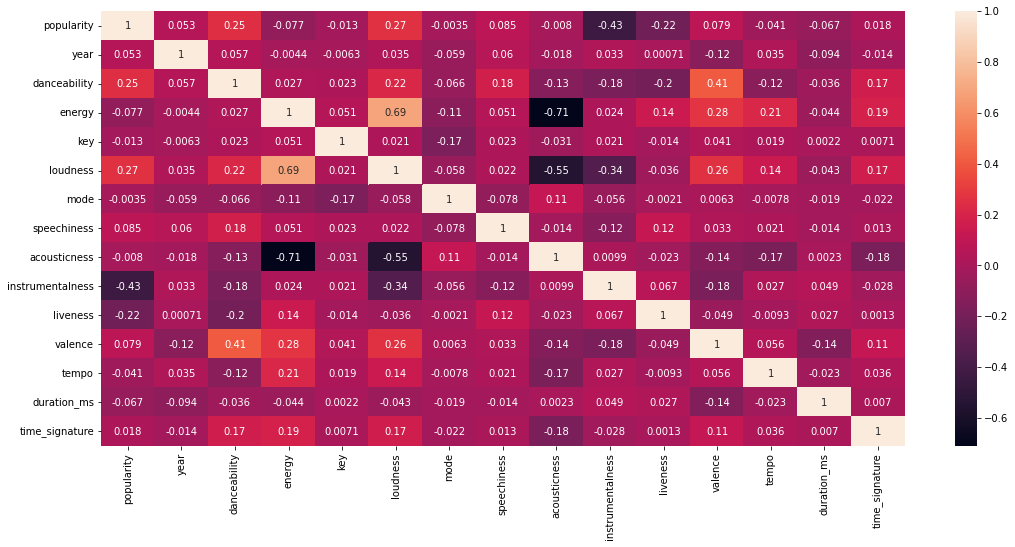

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

[]

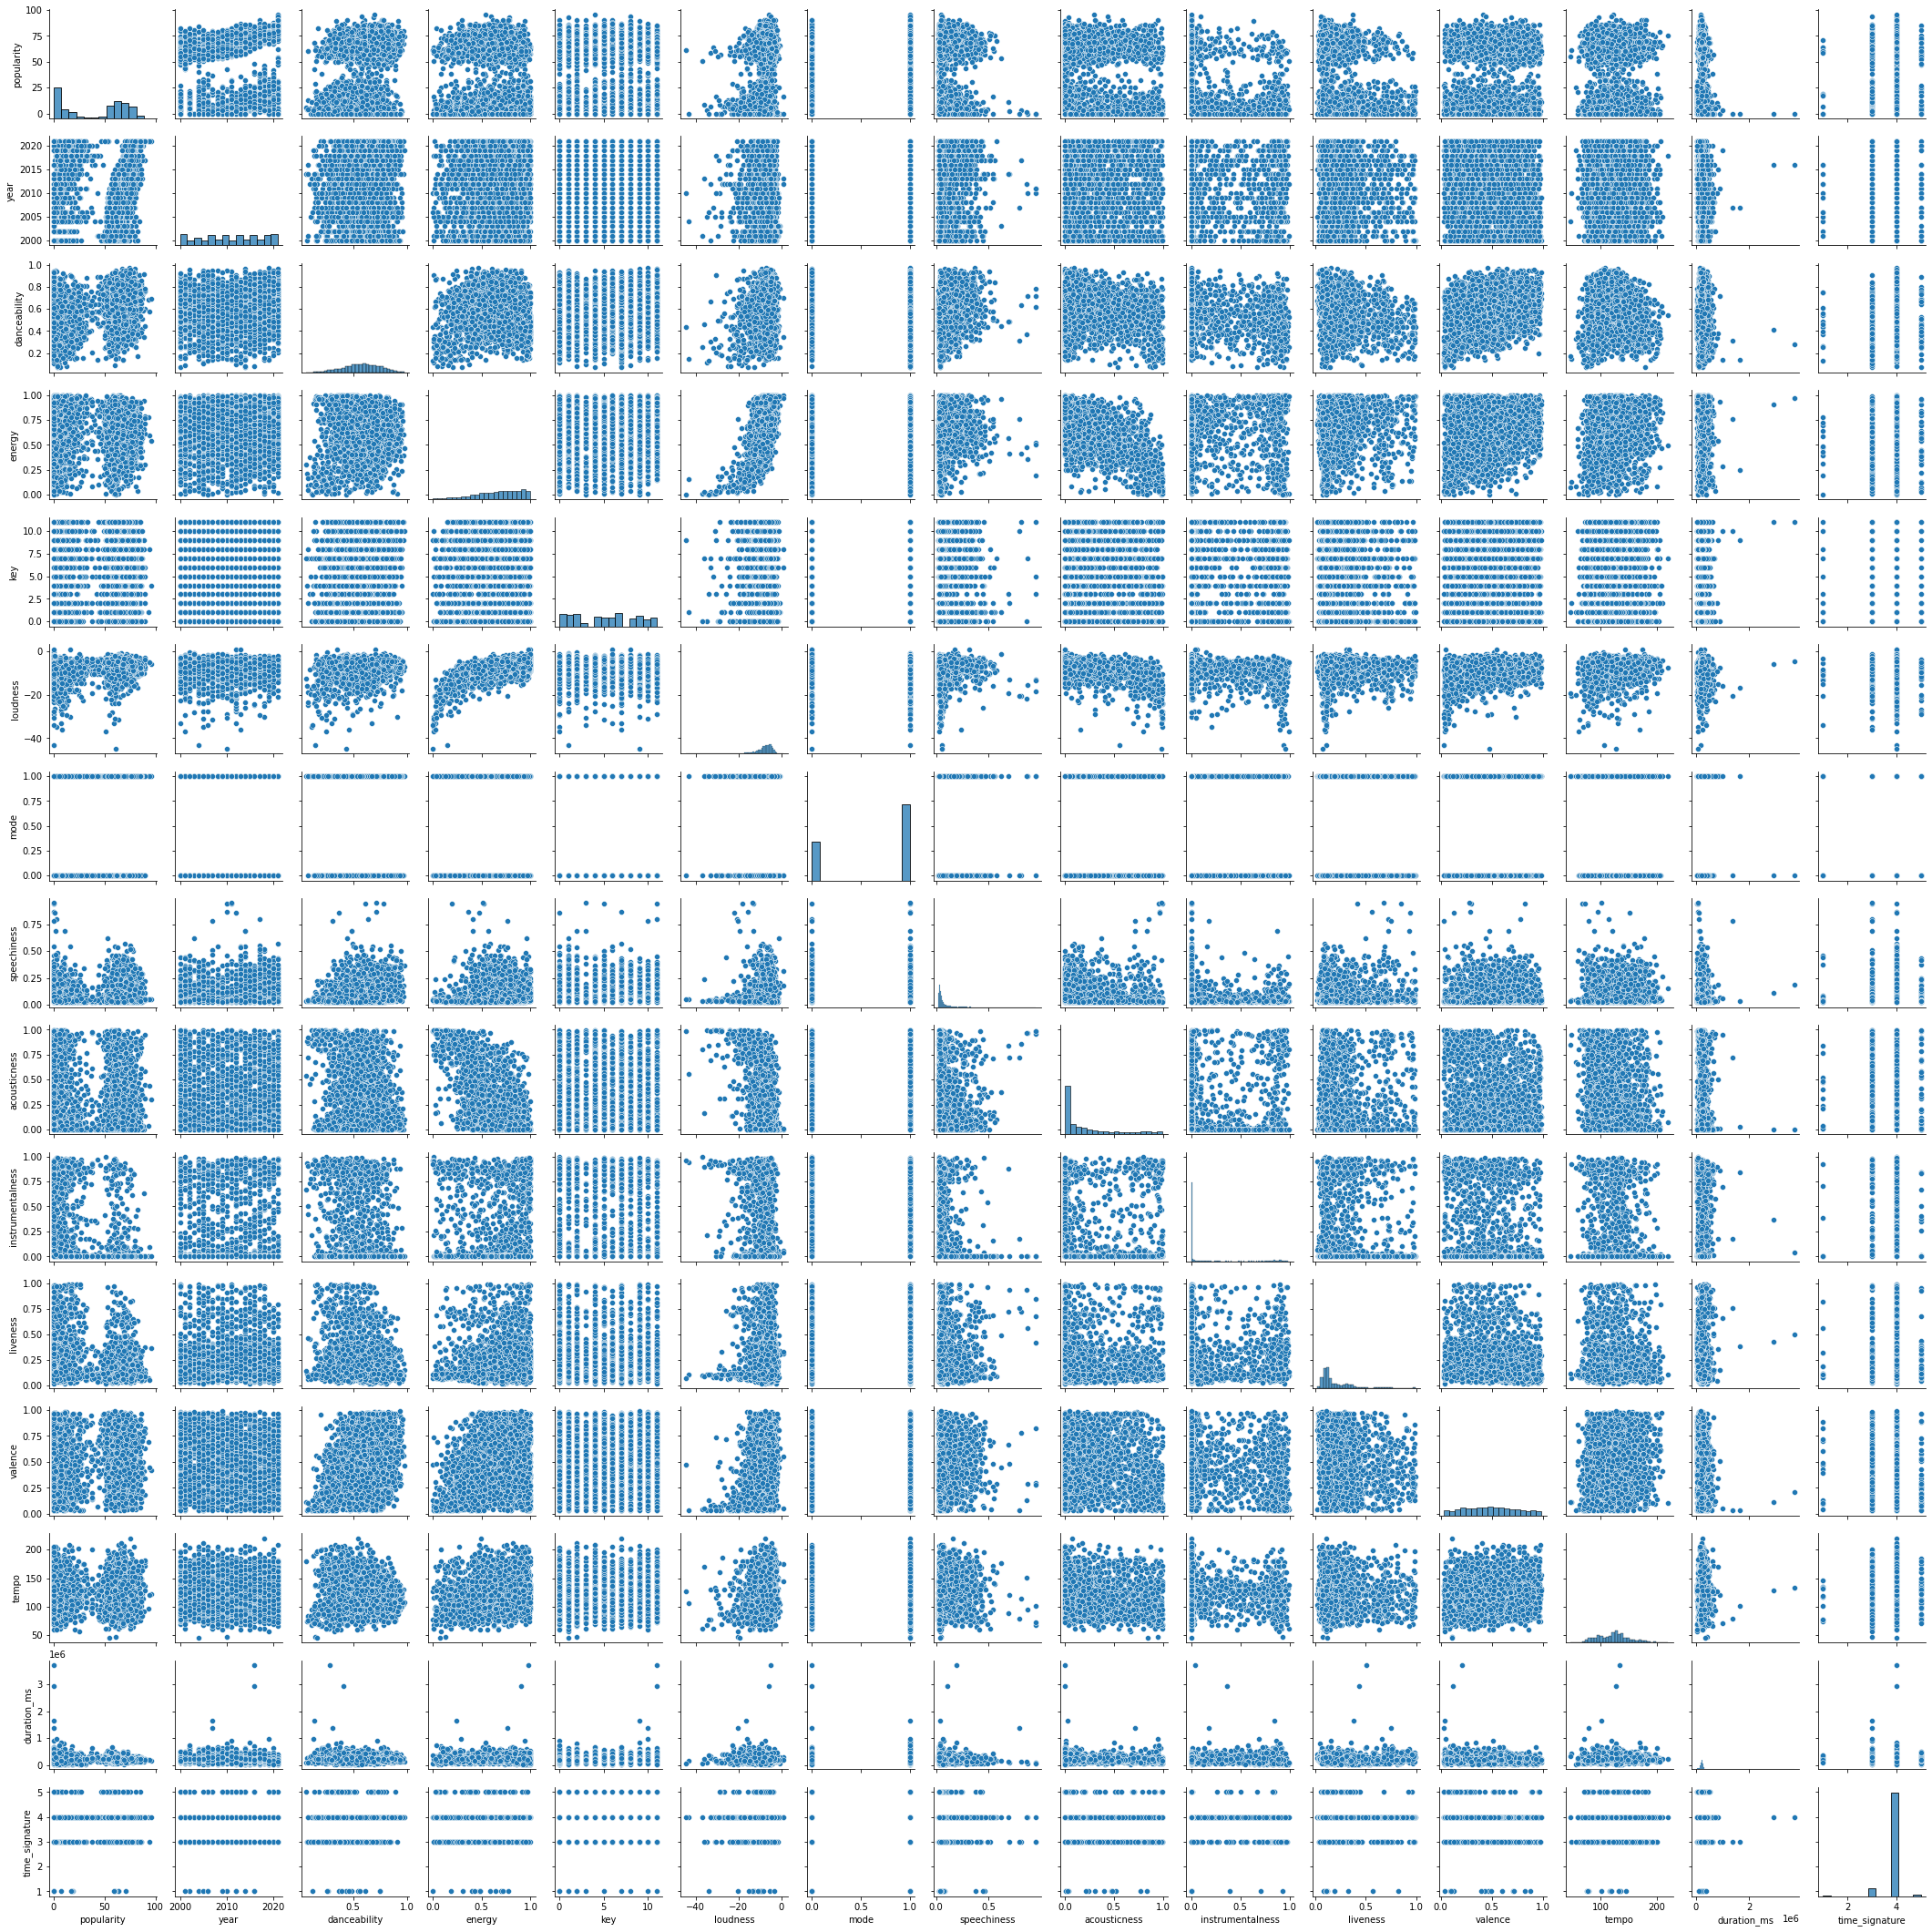

In [ ]:
num_cols = df.select_dtypes(include='number')

sns.pairplot(df.sample(3000), height=2, vars=num_cols)
plt.plot()

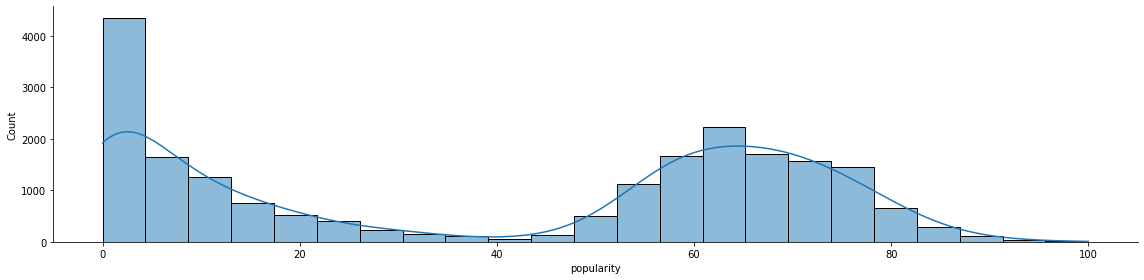

In [ ]:
sns.displot(df['popularity'], kde=True, height=4, aspect=4/1)
plt.show()

> The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

"[Spotify Web API Reference](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-tracks)"

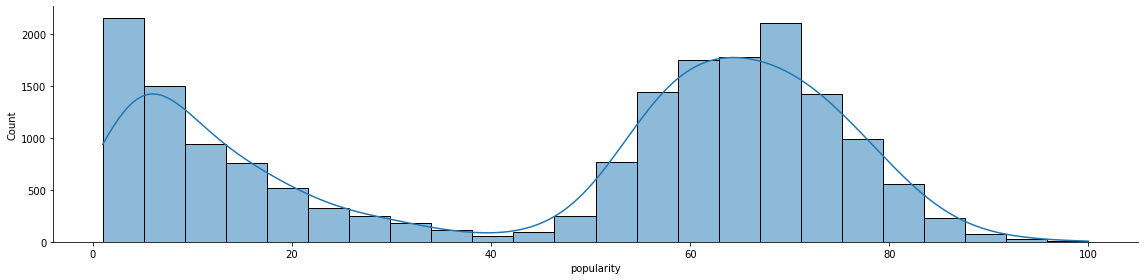

In [ ]:
is_zero = df[df['popularity'] == 0].index
df.drop(is_zero, axis=0, inplace=True)
sns.displot(df['popularity'], kde=True, height=4, aspect=4/1)
plt.show()

## Categorical features

### Artists

Some tracks have various artists and it can change the situation, so let us add a feature to handling this:

In [ ]:
df['artist_count'] = df['artist'].apply(lambda x: len(x))
df.tail()

artist  ... artist_count
21990       [YBN Nahmir, 21 Savage]  ...            2
21991                   [Incognito]  ...            1
21992                   [MadeinTYO]  ...            1
21993    [Incognito, Roger Sanchez]  ...            2
21994  [Gunna, Future, Roddy Ricch]  ...            3

[5 rows x 19 columns]

In [ ]:
df = df.explode('artist', ignore_index=True)
df.shape

(26254, 19)

In [ ]:
df.tail()

artist  ... artist_count
26249      Incognito  ...            2
26250  Roger Sanchez  ...            2
26251          Gunna  ...            3
26252         Future  ...            3
26253    Roddy Ricch  ...            3

[5 rows x 19 columns]

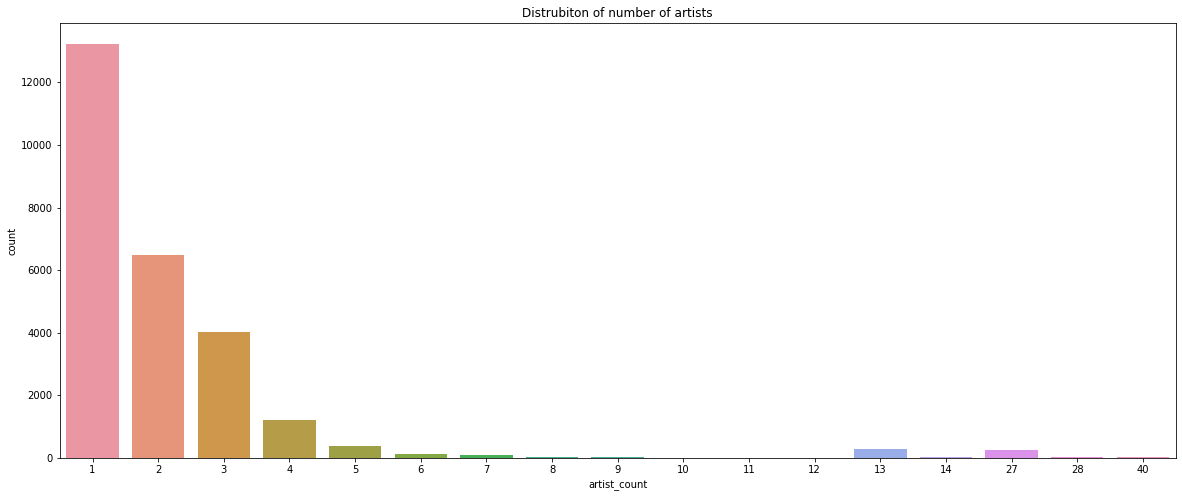

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(x = df['artist_count'])
plt.title('Distrubiton of number of artists')
plt.show()

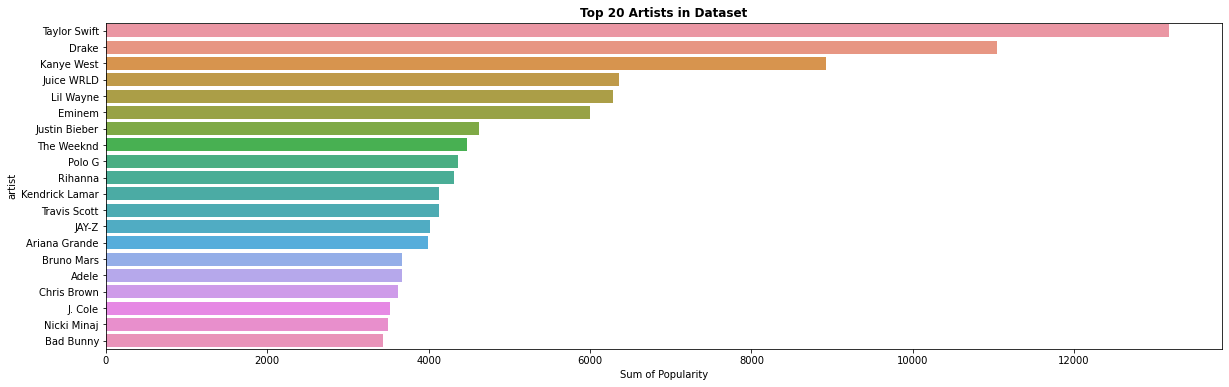

In [ ]:
fig, ax = plt.subplots(figsize = (20, 6))
popular_artists = df.groupby('artist')['popularity'].sum().sort_values(ascending=False).head(20)
sns.barplot(x=popular_artists.values, y=popular_artists.index)
ax.set_xlabel('Sum of Popularity')
ax.set_title('Top 20 Artists in Dataset', weight='bold')
plt.show()

<Figure size 1440x216 with 0 Axes>

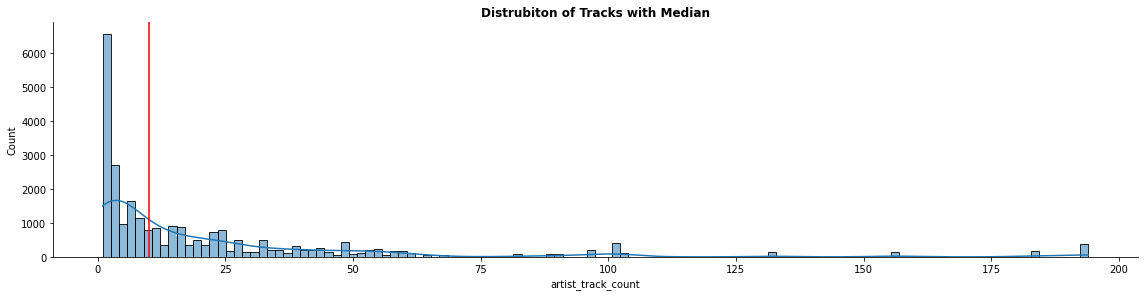

In [ ]:
df['artist_track_count'] = df.groupby('artist')['artist'].transform('count')
median_count = df['artist_track_count'].median()
plt.figure(figsize = (20, 3))
sns.displot(df['artist_track_count'], kde=True, height=4, aspect=4/1)
plt.axvline(x=median_count, color='r')
plt.title('Distrubiton of Tracks with Median', weight='bold')
plt.show()

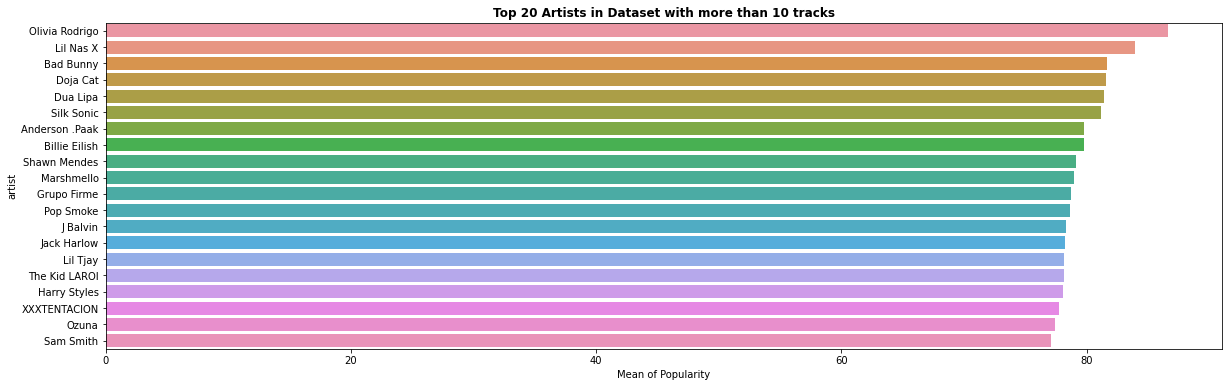

In [ ]:
plt.figure(figsize=(20, 6))
popular_artists = df[df.artist_track_count > median_count].groupby('artist')['popularity'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=popular_artists.values, y=popular_artists.index)
plt.xlabel('Mean of Popularity')
plt.title('Top 20 Artists in Dataset with more than {} tracks'.format(int(median_count)), weight='bold')
plt.show()

### Mode
> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

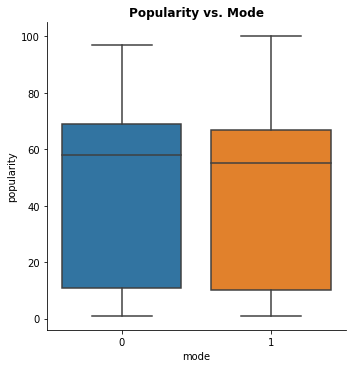

In [ ]:
sns.catplot(data=df, kind="box", x="mode", y="popularity")
plt.title('Popularity vs. Mode', weight='bold')
plt.show()

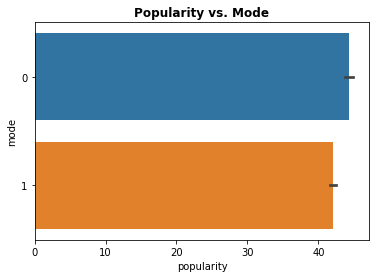

In [ ]:
sns.barplot(data=df, x="popularity", y="mode", orient='h')
plt.title('Popularity vs. Mode', weight='bold')
plt.show()

### Key
> The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

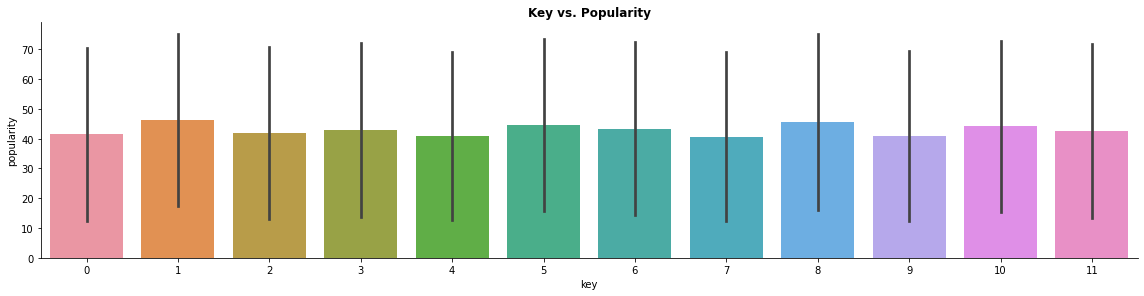

In [ ]:
sns.catplot(data=df, kind="bar", x="key", y="popularity",ci = 'sd', height=4, aspect = 4)
plt.title('Key vs. Popularity', weight='bold')
plt.show()

## Numerical Features

### Acousticness
> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

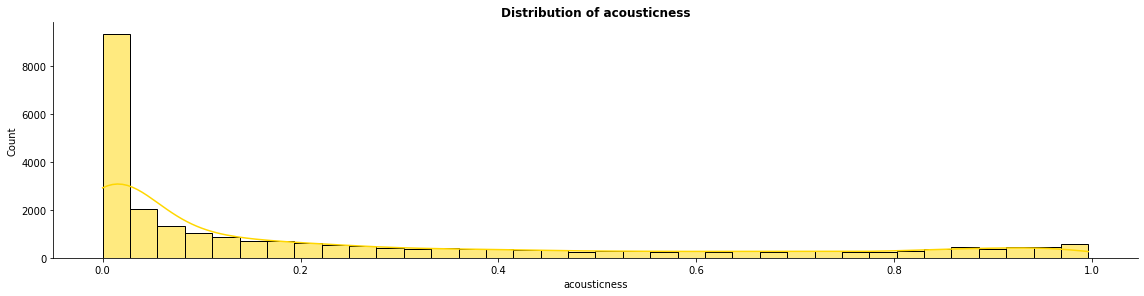

In [ ]:
sns.displot(df['acousticness'], kde=True, color='gold', height=4, aspect = 4)
plt.title('Distribution of acousticness', weight='bold')
plt.show()

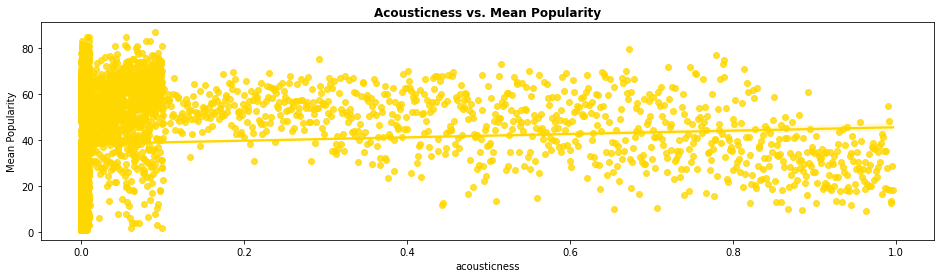

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
ax_data =  df.groupby('acousticness')['popularity'].mean().to_frame().reset_index()
ax = sns.regplot(x = ax_data['acousticness'], y = ax_data['popularity'], color='gold')
ax.set_title('Acousticness vs. Mean Popularity', weight='bold')
ax.set_ylabel('Mean Popularity')
plt.show()

### Daneability
> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

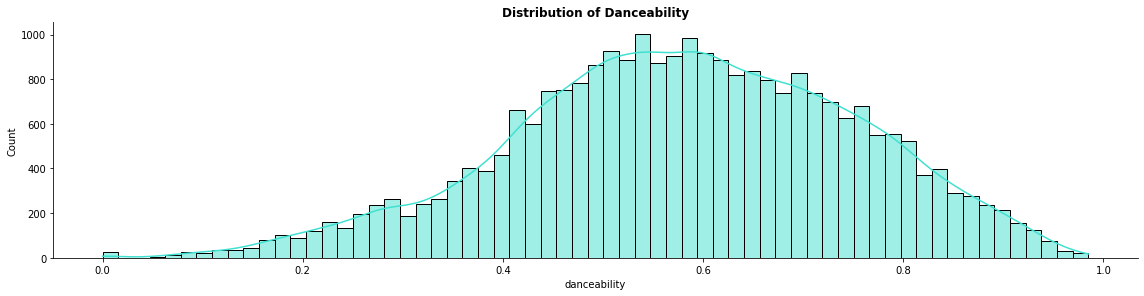

In [ ]:
sns.displot(df['danceability'], kde=True, color='turquoise', height=4, aspect = 4)
plt.title('Distribution of Danceability', weight='bold')
plt.show()

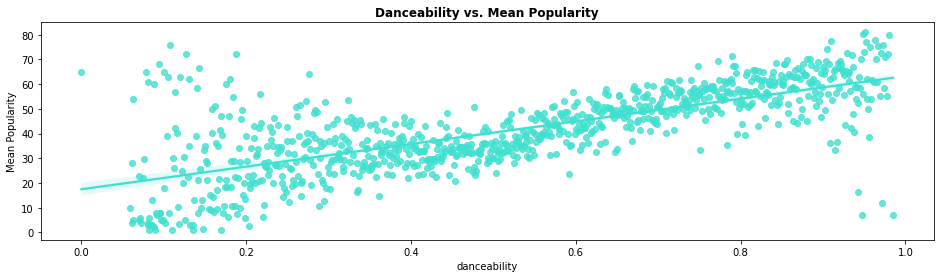

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
ax_data =  df.groupby('danceability')['popularity'].mean().to_frame().reset_index()
ax = sns.regplot(x = ax_data['danceability'], y = ax_data['popularity'], color='turquoise')
ax.set_title('Danceability vs. Mean Popularity', weight='bold')
ax.set_ylabel('Mean Popularity')
plt.show()

### Energy
> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

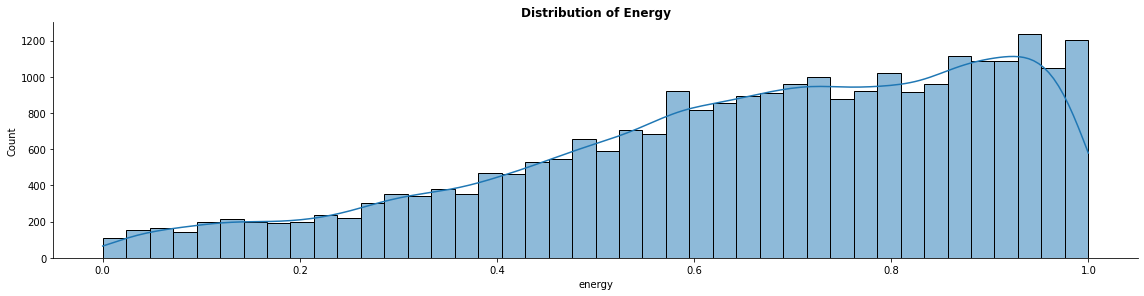

In [ ]:
sns.displot(df['energy'], kde=True, height=4, aspect = 4)
plt.title('Distribution of Energy', weight='bold')
plt.show()

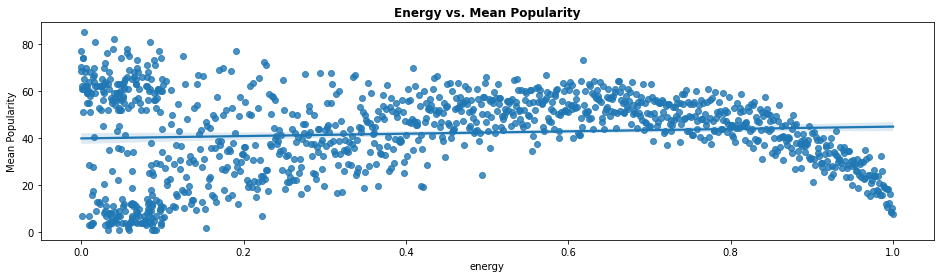

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
ax_data =  df.groupby('energy')['popularity'].mean().to_frame().reset_index()
ax = sns.regplot(x = ax_data['energy'], y = ax_data['popularity'])
ax.set_title('Energy vs. Mean Popularity', weight='bold')
ax.set_ylabel('Mean Popularity')
plt.show()

### Instrumentalness
> Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

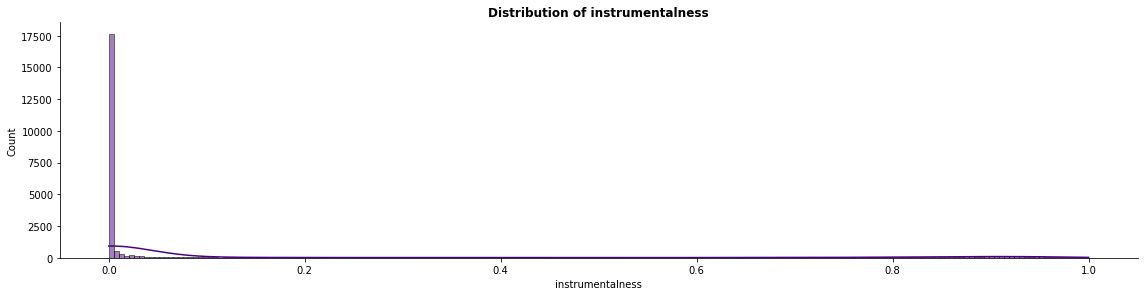

In [ ]:
sns.displot(df['instrumentalness'], kde=True, color='indigo', height=4, aspect = 4)
plt.title('Distribution of instrumentalness', weight='bold')
plt.show()

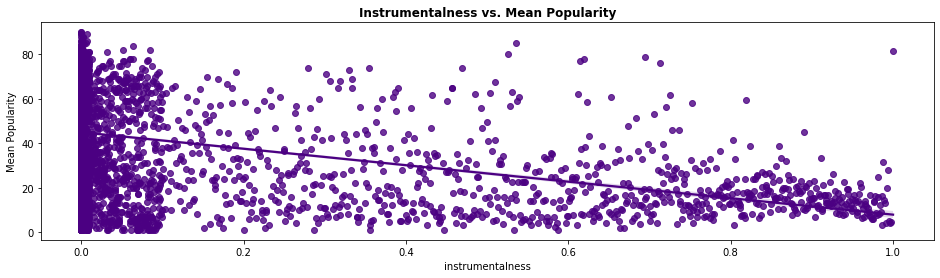

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
ax_data =  df.groupby('instrumentalness')['popularity'].mean().to_frame().reset_index()
ax = sns.regplot(x = ax_data['instrumentalness'], y = ax_data['popularity'], color='indigo',)
ax.set_title('Instrumentalness vs. Mean Popularity', weight='bold')
ax.set_ylabel('Mean Popularity')
plt.show()

### Liveness
> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

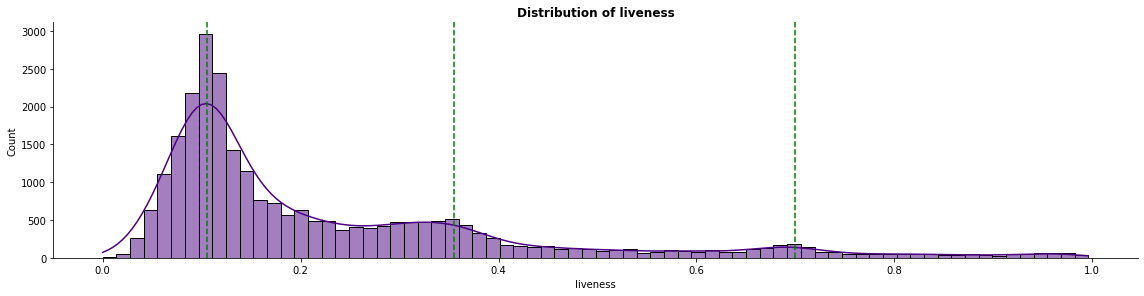

In [ ]:
sns.displot(df['liveness'], kde=True, color='indigo', height=4, aspect = 4)
plt.title('Distribution of liveness', weight='bold')
plt.axvline(x=0.105, color='green', linestyle='--')
plt.axvline(x=0.355, color='green', linestyle='--')
plt.axvline(x=0.7, color='green', linestyle='--')
plt.show()

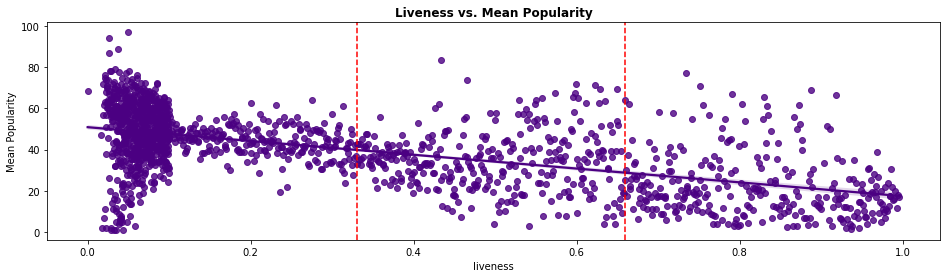

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
ax_data =  df.groupby('liveness')['popularity'].mean().to_frame().reset_index()
ax = sns.regplot(x = ax_data['liveness'], y = ax_data['popularity'], color='indigo',)
ax.set_title('Liveness vs. Mean Popularity', weight='bold')
ax.set_ylabel('Mean Popularity')
plt.axvline(x=0.33, color='red', linestyle='--')
plt.axvline(x=0.66, color='red', linestyle='--')
plt.show()

### Loudness
> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

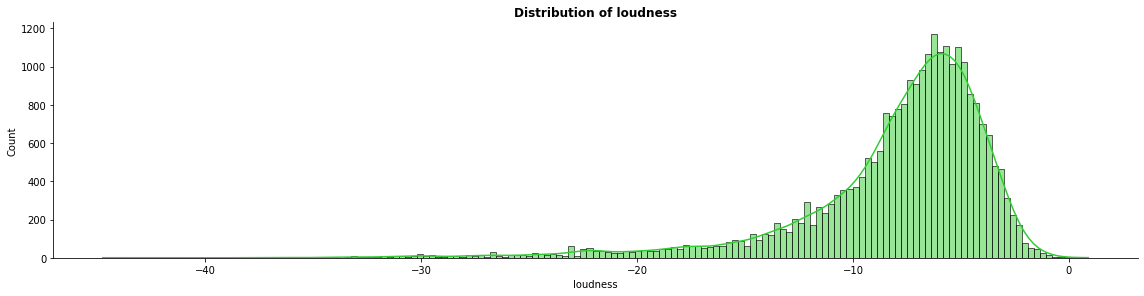

In [ ]:
sns.displot(df['loudness'], kde=True, color='limegreen', height=4, aspect = 4)
plt.title('Distribution of loudness', weight='bold')
plt.show()

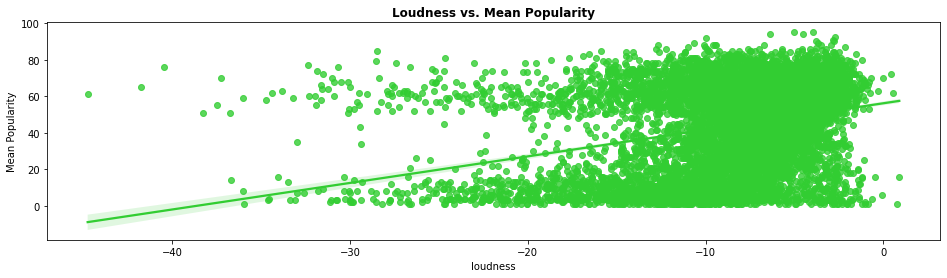

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
ax_data =  df.groupby('loudness')['popularity'].mean().to_frame().reset_index()
ax = sns.regplot(x = ax_data['loudness'], y = ax_data['popularity'], color='limegreen',)
ax.set_title('Loudness vs. Mean Popularity', weight='bold')
ax.set_ylabel('Mean Popularity')
plt.show()

### Tempo
> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

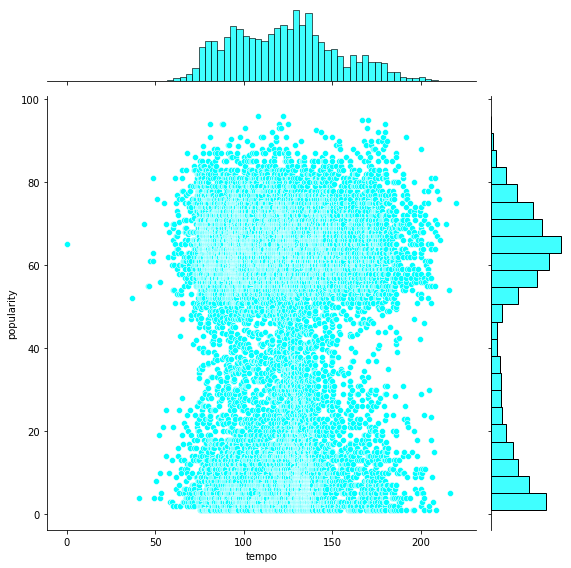

In [ ]:
ax_data =  df.groupby('tempo')['popularity'].mean().to_frame().reset_index()
ax = sns.jointplot(x = ax_data['tempo'], y = ax_data['popularity'], color='cyan', height=8)
plt.show()

### Speechiness
> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

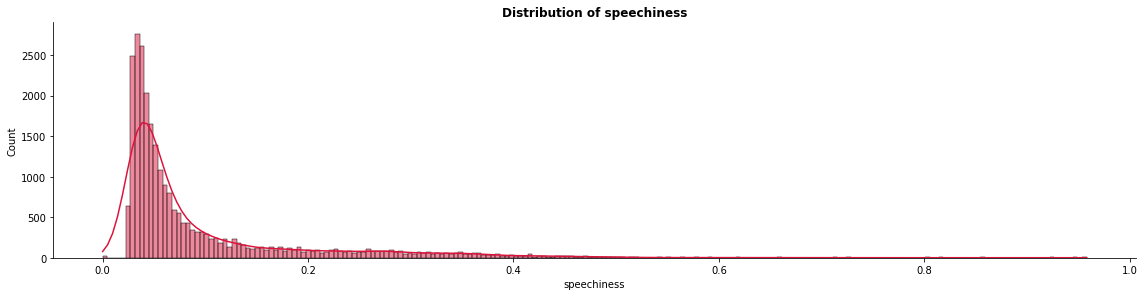

In [ ]:
sns.displot(df['speechiness'], kde=True, color='crimson', height=4, aspect = 4)
plt.title('Distribution of speechiness', weight='bold')
plt.show()

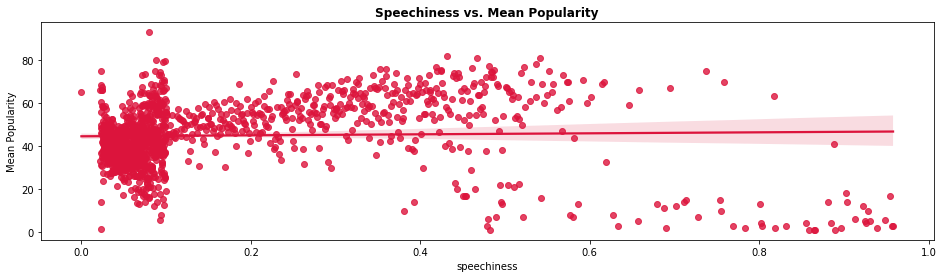

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
ax_data =  df.groupby('speechiness')['popularity'].mean().to_frame().reset_index()
ax = sns.regplot(x = ax_data['speechiness'], y = ax_data['popularity'], color='crimson',)
ax.set_title('Speechiness vs. Mean Popularity', weight='bold')
ax.set_ylabel('Mean Popularity')
plt.show()

### Valence
> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


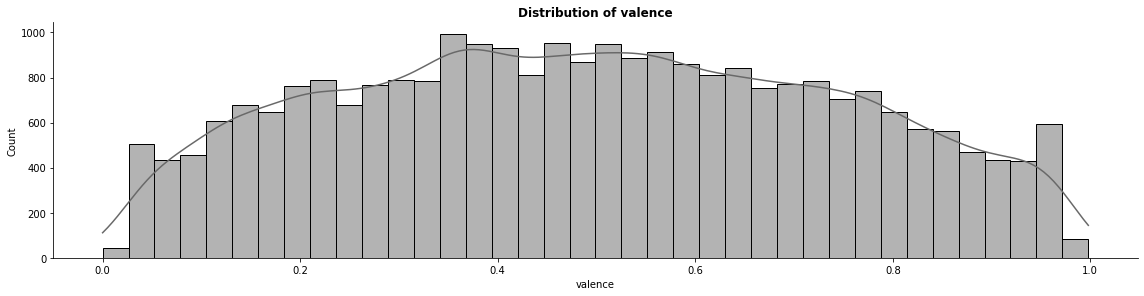

In [ ]:
sns.displot(df['valence'], kde=True, color='dimgray', height=4, aspect = 4)
plt.title('Distribution of valence', weight='bold')
plt.show()

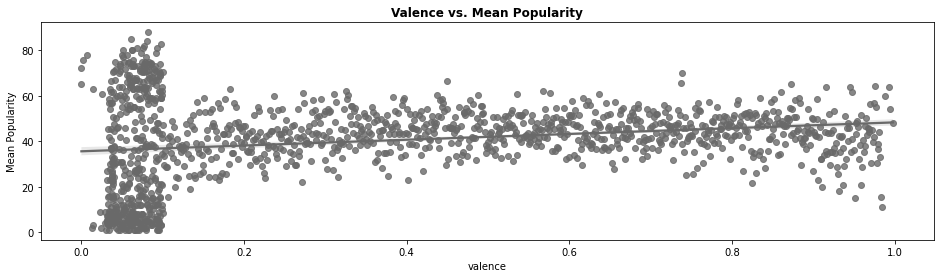

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
ax_data =  df.groupby('valence')['popularity'].mean().to_frame().reset_index()
ax = sns.regplot(x = ax_data['valence'], y = ax_data['popularity'], color='dimgray',)
ax.set_title('Valence vs. Mean Popularity', weight='bold')
ax.set_ylabel('Mean Popularity')
plt.show()

In [ ]:
print('Corr is {}'.format(df['tempo'].corr(df['popularity'])))

Corr is -0.05779775187741583


### Duration
> The duration of the track in milliseconds.

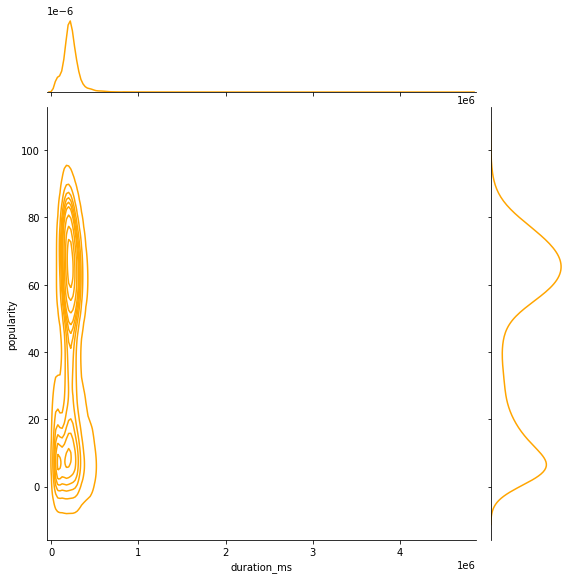

In [ ]:
ax_data =  df.groupby('duration_ms')['popularity'].mean().to_frame().reset_index()
ax = sns.jointplot(x = ax_data['duration_ms'], y = ax_data['popularity'], color='orange', height=8, kind="kde")
plt.show()

---
# PreProcessing

## Feature Engineering

In [ ]:

df['instrumentalness'] = np.sqrt(df['instrumentalness'])
def classify_liveness(x):
    if x <= 0.33:
        return 1
    elif x <= 0.66:
        return 2
    else:
        return 3

df['liveness'] = df['liveness'].apply(classify_liveness)

## Feature Selection

In [ ]:
dff = df.copy()
y = dff.pop('popularity')
X = dff

num_cols = X.select_dtypes('number').columns
obj_cols = X.select_dtypes('object').columns

print(obj_cols)

Index(['artist', 'name', 'id'], dtype='object')


In [ ]:
encoder = OrdinalEncoder()
X['artist'] = encoder.fit_transform(X)

X = X.drop(columns=['name', 'id'])
X.head()

artist  year  danceability  ...  time_signature  artist_count  artist_track_count
0  1478.0  2000         0.429  ...               4             1                  36
1  5853.0  2000         0.325  ...               4             1                  10
2  1478.0  2000         0.371  ...               3             1                  36
3  2680.0  2000         0.270  ...               4             1                  21
4  2181.0  2000         0.949  ...               4             1                  89

[5 rows x 17 columns]

In [ ]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, (X.dtypes == int))
mi_scores

duration_ms           0.747784
tempo                 0.705898
loudness              0.655343
acousticness          0.596253
energy                0.489291
instrumentalness      0.486707
speechiness           0.454022
danceability          0.452480
valence               0.448449
year                  0.372846
artist                0.344729
artist_track_count    0.219269
artist_count          0.129762
liveness              0.038685
key                   0.017700
time_signature        0.009362
mode                  0.003718
Name: MI Scores, dtype: float64

In [ ]:
threshold = 0.3
features = mi_scores[(mi_scores > threshold)].index
X = X[features]
X.head()

duration_ms    tempo  loudness  ...  valence  year  artist
0     266773.0  173.372    -7.227  ...    0.285  2000  1478.0
1     247787.0  176.600    -7.510  ...    0.454  2000  5853.0
2     227093.0  102.617   -10.506  ...    0.165  2000  1478.0
3     158390.0  190.131    -4.861  ...    0.644  2000  2680.0
4     284200.0  104.504    -4.244  ...    0.760  2000  2181.0

[5 rows x 11 columns]

## Feature Scaling

In [ ]:
y /= 100
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)

## Cross Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

print('X train shape:{}\t y train shape:{}'.format(X_train.shape, y_train.shape))
print('X test shape:{}\t\t y test shape:{}'.format(X_test.shape, y_test.shape))
print('Cleaned data Frame Shape:{}'.format(df.shape))

X train shape:(19690, 11)	 y train shape:(19690,)
X test shape:(6564, 11)		 y test shape:(6564,)
Cleaned data Frame Shape:(26254, 20)


---
# Model Creation

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train).clip(0, 1)

rmse = np.sqrt(mse(y_train, y_train_preds))
print('RMSE Train = {}'.format(np.round(rmse, 5)))

y_test_preds = lr_model.predict(X_test).clip(0, 1)

rmse = np.sqrt(mse(y_test, y_test_preds))
print('RMSE Test = {}'.format(np.round(rmse, 5)))

RMSE Train = 0.23381
RMSE Test = 0.23406


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

y_train_preds = dt_model.predict(X_train).clip(0, 1)

rmse = np.sqrt(mse(y_train, y_train_preds))
print('RMSE Train = {}'.format(np.round(rmse, 5)))

y_test_preds = dt_model.predict(X_test).clip(0, 1)

rmse = np.sqrt(mse(y_test, y_test_preds))
print('RMSE Test = {}'.format(np.round(rmse, 5)))

RMSE Train = 0.01123
RMSE Test = 0.22195


## XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbr = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=0,
    objective = 'reg:squarederror',
    )

xgbr.fit(X_train, y_train)

y_train_preds = xgbr.predict(X_train).clip(0, 1)

rmse = np.sqrt(mse(y_train, y_train_preds))
print('RMSE Train = {}'.format(np.round(rmse, 5)))

y_test_preds = xgbr.predict(X_test).clip(0, 1)

rmse = np.sqrt(mse(y_test, y_test_preds))
print('RMSE Test = {}'.format(np.round(rmse, 5)))

RMSE Train = 0.1974
RMSE Test = 0.20103


## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(0)

model = tf.keras.models.Sequential(
    [
     layers.Dense(128, activation='relu', kernel_initializer='normal', input_shape=(11,)),
     layers.Dense(32, activation='relu', kernel_initializer='normal'),
     layers.Dense(1, kernel_initializer='normal'),
    ]
)

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.fit(
    X_train, y_train,
    batch_size=10,
    epochs=10,
    verbose=1,
)

Epoch 1/10
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0499 - root_mean_squared_error: 0.2233
Epoch 2/10
1969/1969 [==============================] - 5s 3ms/step - loss: 0.0428 - root_mean_squared_error: 0.2070
Epoch 3/10
1969/1969 [==============================] - 5s 3ms/step - loss: 0.0412 - root_mean_squared_error: 0.2030
Epoch 4/10
1969/1969 [==============================] - 5s 3ms/step - loss: 0.0401 - root_mean_squared_error: 0.2002
Epoch 5/10
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0390 - root_mean_squared_error: 0.1975
Epoch 6/10
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0383 - root_mean_squared_error: 0.1958
Epoch 7/10
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0378 - root_mean_squared_error: 0.1944
Epoch 8/10
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0373 - root_mean_squared_error: 0.1930
Epoch 9/10
1969/1969 [==============================] - 5s 3ms/s

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=10)

print('loss: {}\naccuracy: {}'.format(score[0], score[1]))

657/657 [==============================] - 2s 3ms/step - loss: 0.0372 - root_mean_squared_error: 0.1928
loss: 0.03717483580112457
accuracy: 0.19280776381492615
